# BORG SDSS data products
## borg_sdss_classifiers package
* Authors: Florent Leclercq, Guilhem Lavaux, Jens Jasche, Benjamin Wandelt
* Last update: 09/10/2018

This package contains some of the data used or produced by [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758), who performed an information-theoretic comparison of cosmic web classifiers.

Structures are defined using the T-web ([Hahn et al. 2007](https://arxiv.org/abs/astro-ph/0610280)), DIVA ([Lavaux & Wandelt 2010](https://arxiv.org/abs/0906.4101)), or ORIGAMI ([Falck et al. 2012](https://arxiv.org/abs/1201.2353)) algorithms. Data are provided in terms of a standard 3D numpy array and can easily be accessed and processed using python.

For further details on the data and employed methods please consult [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758) (reference below).

## File content

This package consists of two files:
* **borg_sdss_classifiers.ipynb**: The notebook that you are currently reading.
* **borg_sdss_classifiers.tar.gz**: Archive available on [GitHub LFS](https://github.com/florent-leclercq/borg_sdss_data_release/blob/master/borg_sdss_classifiers/borg_sdss_classifiers.tar.gz) and on [the author's website](http://www.florent-leclercq.eu/data/borg_sdss_classifiers.tar.gz).

The archive borg_sdss_classifiers.tar.gz can be extracted using

```bash
tar -xzf borg_sdss_classifiers.tar.gz
```

The archive contains 2 files:

**borg_sdss_js_DE.npz**:
	This file contains three maps of the Jensen-Shannon divergence between cosmic web-type posteriors for different dark energy models (w=-0.9, w=-1, w=-1.1). Structures are defined using the T-web ([Hahn et al. 2007](https://arxiv.org/abs/astro-ph/0610280)), DIVA ([Lavaux & Wandelt 2010](https://arxiv.org/abs/0906.4101)), or ORIGAMI ([Falck et al. 2012](https://arxiv.org/abs/1201.2353)) algorithms.

**galaxy_catalog.dat**:
	This file contains the galaxy catalog used in section III.C of [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758). Please see the header of this file for documentation. This catalog can be used to reproduce figure 6 of [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758), using also the decision theory criterion of [Leclercq et al. (2015c)](https://arxiv.org/abs/1503.00730). In particular, please refer to the notebook **borg_sdss_tweb.ipynb** in the 'borg_sdss_tweb' package of the BORG SDSS data release.

***Important***: The current notebook also requires the files **borg_sdss_tweb.npz**, **borg_sdss_diva.npz** and **borg_sdss_origami.npz** provided in the corresponding packages of the BORG SDSS data release.

## Usage

### Loading and accessing the data

We first load the tweb, diva, and origami maps provided in their respective packages:

In [1]:
import numpy as np
tweb = np.load('borg_sdss_tweb.npz')
diva = np.load('borg_sdss_diva.npz')
origami = np.load('borg_sdss_origami.npz')

The ranges describing the extent of the cubic cartesian volume along the x,y and z axes can be accessed as follows:

In [2]:
#Minimum and maximum position along the x-axis in Mpc/h
xmin=tweb['ranges'][0]
xmax=tweb['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=tweb['ranges'][2]
ymax=tweb['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=tweb['ranges'][4]
zmax=tweb['ranges'][5]

Units are Mpc/h.

(Note that all the maps that are part of the BORG SDSS data products have consistent coordinate systems. The coordinate transform to change from Cartesian to spherical coordinates and vice versa is given in appendix B of [Jasche et al. 2015](https://arxiv.org/abs/1409.6308)).

Some useful definitions for the following plots:

In [3]:
from pylab import *
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

### Example: Information gain (Kullback-Leibler divergence) 

We first define the posteriors, i.e. the 3D probabilistic maps for structures:

In [4]:
tweb_voids=tweb['voids']
tweb_sheets=tweb['sheets']
tweb_filaments=tweb['filaments']
tweb_clusters=tweb['clusters']
diva_voids=diva['voids']
diva_sheets=diva['sheets']
diva_filaments=diva['filaments']
diva_clusters=diva['clusters']
origami_voids=origami['voids']
origami_sheets=origami['sheets']
origami_filaments=origami['filaments']
origami_clusters=origami['clusters']

The corresponding prior probabilities are given in table III in [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758):

In [5]:
prior_tweb_voids = 0.14261
prior_tweb_sheets = 0.59561
prior_tweb_filaments = 0.24980
prior_tweb_clusters = 0.01198
prior_diva_voids = 0.20216
prior_diva_sheets = 0.54845
prior_diva_filaments = 0.22587
prior_diva_clusters = 0.02352
prior_origami_voids = 0.89459
prior_origami_sheets = 0.06727
prior_origami_filaments = 0.02249
prior_origami_clusters = 0.01565

The information gain (Kullback-Leibler divergence) is computed as follows:

In [6]:
tweb_VlogV = tweb_voids*np.log2(tweb_voids)
tweb_SlogS = tweb_sheets*np.log2(tweb_sheets)
tweb_FlogF = tweb_filaments*np.log2(tweb_filaments)
tweb_ClogC = tweb_clusters*np.log2(tweb_clusters)
tweb_VlogV[np.isnan(tweb_VlogV)]=0.
tweb_SlogS[np.isnan(tweb_SlogS)]=0.
tweb_FlogF[np.isnan(tweb_FlogF)]=0.
tweb_ClogC[np.isnan(tweb_ClogC)]=0.

tweb_VlogPrior_V = tweb_voids*np.log2(prior_tweb_voids)
tweb_SlogPrior_S = tweb_sheets*np.log2(prior_tweb_sheets)
tweb_FlogPrior_F = tweb_filaments*np.log2(prior_tweb_filaments)
tweb_ClogPrior_C = tweb_clusters*np.log2(prior_tweb_clusters)

tweb_DKL = tweb_VlogV + tweb_SlogS + tweb_FlogF + tweb_ClogC - tweb_ClogPrior_C - tweb_SlogPrior_S - tweb_FlogPrior_F - tweb_VlogPrior_V
del tweb_VlogV, tweb_SlogS, tweb_FlogF, tweb_ClogC, tweb_ClogPrior_C, tweb_SlogPrior_S, tweb_FlogPrior_F, tweb_VlogPrior_V

diva_VlogV = diva_voids*np.log2(diva_voids)
diva_SlogS = diva_sheets*np.log2(diva_sheets)
diva_FlogF = diva_filaments*np.log2(diva_filaments)
diva_ClogC = diva_clusters*np.log2(diva_clusters)
diva_VlogV[np.isnan(diva_VlogV)]=0.
diva_SlogS[np.isnan(diva_SlogS)]=0.
diva_FlogF[np.isnan(diva_FlogF)]=0.
diva_ClogC[np.isnan(diva_ClogC)]=0.

diva_VlogPrior_V = diva_voids*np.log2(prior_diva_voids)
diva_SlogPrior_S = diva_sheets*np.log2(prior_diva_sheets)
diva_FlogPrior_F = diva_filaments*np.log2(prior_diva_filaments)
diva_ClogPrior_C = diva_clusters*np.log2(prior_diva_clusters)

diva_DKL = diva_VlogV + diva_SlogS + diva_FlogF + diva_ClogC - diva_ClogPrior_C - diva_SlogPrior_S - diva_FlogPrior_F - diva_VlogPrior_V
del diva_VlogV, diva_SlogS, diva_FlogF, diva_ClogC, diva_ClogPrior_C, diva_SlogPrior_S, diva_FlogPrior_F, diva_VlogPrior_V

origami_VlogV = origami_voids*np.log2(origami_voids)
origami_SlogS = origami_sheets*np.log2(origami_sheets)
origami_FlogF = origami_filaments*np.log2(origami_filaments)
origami_ClogC = origami_clusters*np.log2(origami_clusters)
origami_VlogV[np.isnan(origami_VlogV)]=0.
origami_SlogS[np.isnan(origami_SlogS)]=0.
origami_FlogF[np.isnan(origami_FlogF)]=0.
origami_ClogC[np.isnan(origami_ClogC)]=0.

origami_VlogPrior_V = origami_voids*np.log2(prior_origami_voids)
origami_SlogPrior_S = origami_sheets*np.log2(prior_origami_sheets)
origami_FlogPrior_F = origami_filaments*np.log2(prior_origami_filaments)
origami_ClogPrior_C = origami_clusters*np.log2(prior_origami_clusters)

origami_DKL = origami_VlogV + origami_SlogS + origami_FlogF + origami_ClogC - origami_ClogPrior_C - origami_SlogPrior_S - origami_FlogPrior_F - origami_VlogPrior_V
del origami_VlogV, origami_SlogS, origami_FlogF, origami_ClogC, origami_ClogPrior_C, origami_SlogPrior_S, origami_FlogPrior_F, origami_VlogPrior_V

We can now plot a slice, reproducing the results of section III.A and figure 3 in [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758):

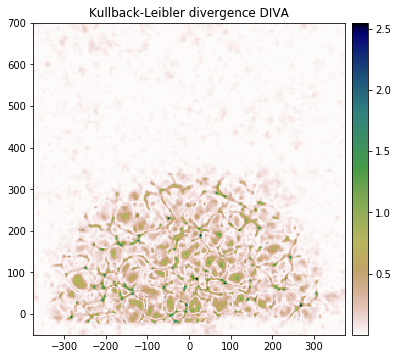

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(diva_DKL[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="gist_earth_r")
ax.set_title("Kullback-Leibler divergence DIVA")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

### Example: Jensen-Shannon divergence diva-origami

We first define the two target probabilities:

In [8]:
V1=diva['voids']
S1=diva['sheets']
F1=diva['filaments']
C1=diva['clusters']
V2=origami['voids']
S2=origami['sheets']
F2=origami['filaments']
C2=origami['clusters']

The Jensen-Shannon divergence is computed as follows:

In [9]:
Vm=1/2.*(V1+V2)
Sm=1/2.*(S1+S2)
Fm=1/2.*(F1+F2)
Cm=1/2.*(C1+C2)

V1logV1 = V1*np.log2(V1)
S1logS1 = S1*np.log2(S1)
F1logF1 = F1*np.log2(F1)
C1logC1 = C1*np.log2(C1)
V1logV1[np.isnan(V1logV1)]=0.
S1logS1[np.isnan(S1logS1)]=0.
F1logF1[np.isnan(F1logF1)]=0.
C1logC1[np.isnan(C1logC1)]=0.

V1logVm = V1*np.log2(Vm)
S1logSm = S1*np.log2(Sm)
F1logFm = F1*np.log2(Fm)
C1logCm = C1*np.log2(Cm)
V1logVm[np.isnan(V1logVm)]=0.
S1logSm[np.isnan(S1logSm)]=0.
F1logFm[np.isnan(F1logFm)]=0.
C1logCm[np.isnan(C1logCm)]=0.

DKL1m = V1logV1 + S1logS1 + F1logF1 + C1logC1 - V1logVm - S1logSm - F1logFm - C1logCm
del V1logV1, S1logS1, F1logF1, C1logC1, V1logVm, S1logSm, F1logFm, C1logCm

V2logV2 = V2*np.log2(V2)
S2logS2 = S2*np.log2(S2)
F2logF2 = F2*np.log2(F2)
C2logC2 = C2*np.log2(C2)
V2logV2[np.isnan(V2logV2)]=0.
S2logS2[np.isnan(S2logS2)]=0.
F2logF2[np.isnan(F2logF2)]=0.
C2logC2[np.isnan(C2logC2)]=0.

V2logVm = V2*np.log2(Vm)
S2logSm = S2*np.log2(Sm)
F2logFm = F2*np.log2(Fm)
C2logCm = C2*np.log2(Cm)
V2logVm[np.isnan(V2logVm)]=0.
S2logSm[np.isnan(S2logSm)]=0.
F2logFm[np.isnan(F2logFm)]=0.
C2logCm[np.isnan(C2logCm)]=0.

DKL2m = V2logV2 + S2logS2 + F2logF2 + C2logC2 - V2logVm - S2logSm - F2logFm - C2logCm
del V2logV2, S2logS2, F2logF2, C2logC2, V2logVm, S2logSm, F2logFm, C2logCm

DJS = 1/2.*(DKL1m + DKL2m)

We can now plot a slice, reproducing the results of section III.A and figure 4 in [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758):

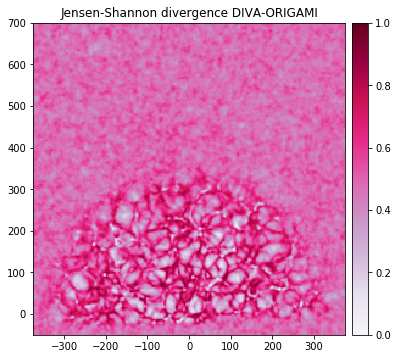

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(DJS[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="PuRd")
ax.set_title("Jensen-Shannon divergence DIVA-ORIGAMI")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

### Example: Jensen-Shannon divergence for dark energy models

We first load the data in **borg_sdss_js_DE.npz**:

In [11]:
js_DE = np.load('borg_sdss_js_DE.npz')

#Minimum and maximum position along the x-axis in Mpc/h
xmin=js_DE['ranges'][0]
xmax=js_DE['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=js_DE['ranges'][2]
ymax=js_DE['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=js_DE['ranges'][4]
zmax=js_DE['ranges'][5]

#3D maps of Jensen-Shannon divergence between cosmic web-type posteriors for different dark energy models
tweb_js_DE=js_DE['tweb']
diva_js_DE=js_DE['diva']
origami_js_DE=js_DE['origami']

We can now plot a slice, reproducing the results of section III.B and figure 5 in [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758):

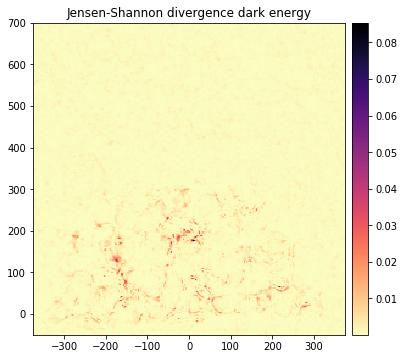

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(diva_js_DE[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="magma_r")
ax.set_title("Jensen-Shannon divergence dark energy")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

### Example: Information gain on galaxy colors

We first load the galaxy catalog **galaxy_catalog.dat** (please refer to the header of this file for the definitions of columns):

In [13]:
ra,dec,redshift,u,g,r,i,z,ugModelColor,grModelColor,riModelColor,izModelColor,Mr,is_red,tweb,diva,origami=\
np.loadtxt("galaxy_catalog.dat", comments="#", unpack=True)
is_red=is_red.astype(int)
tweb=tweb.astype(int)
diva=diva.astype(int)
origami=origami.astype(int)

We are now ready to reproduce the results of section III.C of [Leclercq et al. (2016)](https://arxiv.org/abs/1606.06758), in particular table VI and the utility U3 given in table IV.

#### Information gain (parent)

In [14]:
Ntot=float(is_red.size)
Nred=float(np.sum(is_red==1))
Nblue=Ntot-Nred
H_parent = -Nred/Ntot*np.log2(Nred/Ntot) -Nblue/Ntot*np.log2(Nblue/Ntot)

#### Information gain (T-web)

In [15]:
is_red_voids_tweb=is_red[np.where(tweb==0)]
Nvoids_tweb=float(is_red_voids_tweb.size)
Nred_voids_tweb=float(np.sum(is_red_voids_tweb==1))
Nblue_voids_tweb=Nvoids_tweb-Nred_voids_tweb
H_tweb_voids = -Nred_voids_tweb/Nvoids_tweb*np.log2(Nred_voids_tweb/Nvoids_tweb) -Nblue_voids_tweb/Nvoids_tweb*np.log2(Nblue_voids_tweb/Nvoids_tweb)

is_red_sheets_tweb=is_red[np.where(tweb==1)]
Nsheets_tweb=float(is_red_sheets_tweb.size)
Nred_sheets_tweb=float(np.sum(is_red_sheets_tweb==1))
Nblue_sheets_tweb=Nsheets_tweb-Nred_sheets_tweb
H_tweb_sheets = -Nred_sheets_tweb/Nsheets_tweb*np.log2(Nred_sheets_tweb/Nsheets_tweb) -Nblue_sheets_tweb/Nsheets_tweb*np.log2(Nblue_sheets_tweb/Nsheets_tweb)

is_red_filaments_tweb=is_red[np.where(tweb==2)]
Nfilaments_tweb=float(is_red_filaments_tweb.size)
Nred_filaments_tweb=float(np.sum(is_red_filaments_tweb==1))
Nblue_filaments_tweb=Nfilaments_tweb-Nred_filaments_tweb
H_tweb_filaments = -Nred_filaments_tweb/Nfilaments_tweb*np.log2(Nred_filaments_tweb/Nfilaments_tweb) -Nblue_filaments_tweb/Nfilaments_tweb*np.log2(Nblue_filaments_tweb/Nfilaments_tweb)

is_red_clusters_tweb=is_red[np.where(tweb==3)]
Nclusters_tweb=float(is_red_clusters_tweb.size)
Nred_clusters_tweb=float(np.sum(is_red_clusters_tweb==1))
Nblue_clusters_tweb=Nclusters_tweb-Nred_clusters_tweb
H_tweb_clusters = -Nred_clusters_tweb/Nclusters_tweb*np.log2(Nred_clusters_tweb/Nclusters_tweb) -Nblue_clusters_tweb/Nclusters_tweb*np.log2(Nblue_clusters_tweb/Nclusters_tweb)

# information gain, weighting using galaxies
H_tweb = Nvoids_tweb/Ntot*H_tweb_voids + Nsheets_tweb/Ntot*H_tweb_sheets + Nfilaments_tweb/Ntot*H_tweb_filaments + Nclusters_tweb/Ntot*H_tweb_clusters
IG_tweb = H_parent - H_tweb

In [16]:
IG_tweb

0.01520750251568681

#### Information gain (diva)

In [17]:
is_red_voids_diva=is_red[np.where(diva==0)]
Nvoids_diva=float(is_red_voids_diva.size)
Nred_voids_diva=float(np.sum(is_red_voids_diva==1))
Nblue_voids_diva=Nvoids_diva-Nred_voids_diva
H_diva_voids = -Nred_voids_diva/Nvoids_diva*np.log2(Nred_voids_diva/Nvoids_diva) -Nblue_voids_diva/Nvoids_diva*np.log2(Nblue_voids_diva/Nvoids_diva)

is_red_sheets_diva=is_red[np.where(diva==1)]
Nsheets_diva=float(is_red_sheets_diva.size)
Nred_sheets_diva=float(np.sum(is_red_sheets_diva==1))
Nblue_sheets_diva=Nsheets_diva-Nred_sheets_diva
H_diva_sheets = -Nred_sheets_diva/Nsheets_diva*np.log2(Nred_sheets_diva/Nsheets_diva) -Nblue_sheets_diva/Nsheets_diva*np.log2(Nblue_sheets_diva/Nsheets_diva)

is_red_filaments_diva=is_red[np.where(diva==2)]
Nfilaments_diva=float(is_red_filaments_diva.size)
Nred_filaments_diva=float(np.sum(is_red_filaments_diva==1))
Nblue_filaments_diva=Nfilaments_diva-Nred_filaments_diva
H_diva_filaments = -Nred_filaments_diva/Nfilaments_diva*np.log2(Nred_filaments_diva/Nfilaments_diva) -Nblue_filaments_diva/Nfilaments_diva*np.log2(Nblue_filaments_diva/Nfilaments_diva)

is_red_clusters_diva=is_red[np.where(diva==3)]
Nclusters_diva=float(is_red_clusters_diva.size)
Nred_clusters_diva=float(np.sum(is_red_clusters_diva==1))
Nblue_clusters_diva=Nclusters_diva-Nred_clusters_diva
H_diva_clusters = -Nred_clusters_diva/Nclusters_diva*np.log2(Nred_clusters_diva/Nclusters_diva) -Nblue_clusters_diva/Nclusters_diva*np.log2(Nblue_clusters_diva/Nclusters_diva)

# information gain, weighting using galaxies
H_diva = Nvoids_diva/Ntot*H_diva_voids + Nsheets_diva/Ntot*H_diva_sheets + Nfilaments_diva/Ntot*H_diva_filaments + Nclusters_diva/Ntot*H_diva_clusters
IG_diva = H_parent - H_diva

In [18]:
IG_diva

0.010109875962712733

#### Information gain (origami)

In [19]:
is_red_voids_origami=is_red[np.where(origami==0)]
Nvoids_origami=float(is_red_voids_origami.size)
Nred_voids_origami=float(np.sum(is_red_voids_origami==1))
Nblue_voids_origami=Nvoids_origami-Nred_voids_origami
H_origami_voids = -Nred_voids_origami/Nvoids_origami*np.log2(Nred_voids_origami/Nvoids_origami) -Nblue_voids_origami/Nvoids_origami*np.log2(Nblue_voids_origami/Nvoids_origami)

is_red_sheets_origami=is_red[np.where(origami==1)]
Nsheets_origami=float(is_red_sheets_origami.size)
Nred_sheets_origami=float(np.sum(is_red_sheets_origami==1))
Nblue_sheets_origami=Nsheets_origami-Nred_sheets_origami
H_origami_sheets = -Nred_sheets_origami/Nsheets_origami*np.log2(Nred_sheets_origami/Nsheets_origami) -Nblue_sheets_origami/Nsheets_origami*np.log2(Nblue_sheets_origami/Nsheets_origami)

is_red_filaments_origami=is_red[np.where(origami==2)]
Nfilaments_origami=float(is_red_filaments_origami.size)
Nred_filaments_origami=float(np.sum(is_red_filaments_origami==1))
Nblue_filaments_origami=Nfilaments_origami-Nred_filaments_origami
H_origami_filaments = -Nred_filaments_origami/Nfilaments_origami*np.log2(Nred_filaments_origami/Nfilaments_origami) -Nblue_filaments_origami/Nfilaments_origami*np.log2(Nblue_filaments_origami/Nfilaments_origami)

is_red_clusters_origami=is_red[np.where(origami==3)]
Nclusters_origami=float(is_red_clusters_origami.size)
Nred_clusters_origami=float(np.sum(is_red_clusters_origami==1))
Nblue_clusters_origami=Nclusters_origami-Nred_clusters_origami
H_origami_clusters = -Nred_clusters_origami/Nclusters_origami*np.log2(Nred_clusters_origami/Nclusters_origami) -Nblue_clusters_origami/Nclusters_origami*np.log2(Nblue_clusters_origami/Nclusters_origami)

# information gain, weighting using galaxies
H_origami = Nvoids_origami/Ntot*H_origami_voids + Nsheets_origami/Ntot*H_origami_sheets + Nfilaments_origami/Ntot*H_origami_filaments + Nclusters_origami/Ntot*H_origami_clusters
IG_origami = H_parent - H_origami

In [20]:
IG_origami

0.014293651805665553

## Credit

If you are using this material in your publications please cite the following publication:

> Leclercq, F. and Lavaux, G. and Jasche, J. and Wandelt, B. (2016)<br />
> *Comparing cosmic web classifiers using information theory*<br />
> [Journal of Cosmology and Astroparticle Physics 08, 027 (2016)](http://dx.doi.org/10.1088/1475-7516/2016/08/027)<br />
> [arXiv:1606.06758 [astro-ph.CO]](https://arxiv.org/abs/1606.06758)

For a publication using the 'T-web' maps, please cite

> Leclercq, F. and Jasche, J. and Wandelt, B. (2015b)<br />
> *Bayesian analysis of the dynamic cosmic web in the SDSS galaxy survey*<br />
> [Journal of Cosmology and Astroparticle Physics 06, 015 (2015)](http://dx.doi.org/10.1088/1475-7516/2015/06/015)<br />
> [arXiv:1502.02690 [astro-ph.CO]](https://arxiv.org/abs/1502.02690)

as well as the 'T-web' paper:

> Hahn, O. and Porciani, C. and Carollo, C. M. and Dekel, A. (2007)<br />
> *Properties of dark matter haloes in clusters, filaments, sheets and voids*<br />
> [Monthly Notices of the Royal Astronomical Society 375, 489-499 (2007)](http://dx.doi.org/10.1111/j.1365-2966.2006.11318.x)<br />
> [arXiv:astro-ph/0610280](https://arxiv.org/abs/astro-ph/0610280)

For a publication using the 'DIVA' or 'ORIGAMI' maps, please cite

> Leclercq, F. and Jasche, J. and Lavaux, G. and Wandelt, B and Percival, W. (2017)<br />
> *The phase-space structure of nearby dark matter as constrained by the SDSS*<br />
> [Journal of Cosmology and Astroparticle Physics 06, 049 (2017)](http://dx.doi.org/10.1088/1475-7516/2017/06/049)<br />
> [arXiv:1601.00093 [astro-ph.CO]](https://arxiv.org/abs/1601.00093)

as well as the 'DIVA' and/or 'ORIGAMI' papers:

> Lavaux, G. and Wandelt, B. D. (2010)
> *Precision cosmology with voids: definition, methods, dynamics*<br />
> [Monthly Notices of the Royal Astronomical Society 403, 1392-1408 (2010)](http://dx.doi.org/10.1111/j.1365-2966.2010.16197.x)<br />
> [arXiv:0906.4101 [astro-ph.CO]](https://arxiv.org/abs/0906.4101)

> Falck, B. L. and Neyrinck, M. C. and Szalay, A. S. (2012)<br />
> *ORIGAMI: Delineating Halos Using Phase-space Folds*<br />
> [The Astrophysical Journal 754, 126 (2012)](http://dx.doi.org/10.1088/0004-637X/754/2/126)<br />
> [arXiv:1201.2353 [astro-ph.CO]](https://arxiv.org/abs/1201.2353)

If you use the decision theory formalism (as exemplified in the file borg_sdss_tweb.ipynb of the borg_sdss_tweb package, for example), please cite the following publication:

> Leclercq, F. and Jasche, J. and Wandelt, B. (2015c)<br />
> *Cosmic web-type classification using decision theory*<br />
> [Astronomy & Astrophysics Letters, 576, L17 (2015)](http://dx.doi.org/10.1051/0004-6361/201526006)<br />
> [arXiv:1503.00730 [astro-ph.CO]](https://arxiv.org/abs/1503.00730)

As cosmic web analysis is a derived product of the BORG SDSS analysis, we also kindly ask you to cite the following publications:

> Jasche, J. and Wandelt, B. D. (2013)<br />
> *Bayesian physical reconstruction of initial conditions from large-scale structure surveys*<br />
> [Monthly Notices of the Royal Astronomical Society 432, 894-913 (2013)](http://dx.doi.org/10.1093/mnras/stt449)<br />
> [arXiv:1203.3639 [astro-ph.CO]](https://arxiv.org/abs/1203.3639)

and:

> Jasche, J. and Leclercq, F. and Wandelt, B. D. (2015)<br />
> *Past and present cosmic structure in the SDSS DR7 main sample*<br />
> [Journal of Cosmology and Astroparticle Physics 01, 036 (2015)](http://dx.doi.org/10.1088/1475-7516/2013/11/048)<br />
> [arXiv:1409.6308 [astro-ph.CO]](https://arxiv.org/abs/1409.6308)

We suggest, for example, the following sentences:

> 'This work uses material from the cosmic web classifiers comparison project performed by Leclercq et al. (2016) and the maps obtained by Leclercq et al. (2015b) & Leclercq et al. (2017). These maps are based on the T-web (Hahn et al. 2007), DIVA (Lavaux & Wandelt 2010) and ORIGAMI (Falck et al. 2012) definitions. They build upon the analysis of the SDSS (Jasche et al. 2015) by the BORG algorithm (Jasche & Wandelt 2013).'

> 'This work uses the formalism introduced by Leclercq et al. (2015c) for cosmic web classification using decision theory.'